In [50]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)
today = date.today()
enddate = today

# data = pd.read_csv("RELIANCE.NS.csv")

df = pdr.get_data_yahoo("RELIANCE.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])
cols = list(df)[:7]
data = df[cols].astype(float)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882568,3383424.0
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316254,4662967.0
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603516,8596809.0
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0
...,...,...,...,...,...,...
2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0
2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0
2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0


In [51]:
days = 14


delta = data["Close"].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
average_up = up.ewm(com=(days - 1), adjust=False).mean()
average_down = down.ewm(com=(days - 1), adjust=False).mean()
rs = average_up / average_down

data['RSI'] = 100 - (100 / (1 + rs))

data = data.iloc[days:]

# data = data['RSI']
data = data[1:]
data

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-22,448.325317,449.340698,435.620758,437.725800,416.035248,10947527.0,49.229819
2015-01-23,440.821442,444.684845,434.382477,439.286011,417.518127,8344145.0,50.361077
2015-01-27,442.257843,444.139984,436.116058,440.350922,418.530273,8279250.0,51.160974
2015-01-28,438.889771,450.628479,438.889771,449.167328,426.909821,8906082.0,57.296338
2015-01-29,449.291168,462.862518,449.192108,460.336456,437.525452,16668291.0,63.544456
...,...,...,...,...,...,...,...
2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0,40.951364
2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0,54.054219
2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0,54.099744


In [52]:
# data = data[['Close',"RSI"]]
data = data[['Close','RSI']]
data

,Close,RSI
Date,,
2015-01-22,437.725800,49.229819
2015-01-23,439.286011,50.361077
2015-01-27,440.350922,51.160974
2015-01-28,449.167328,57.296338
2015-01-29,460.336456,63.544456
...,...,...
2023-03-29,2234.699951,40.951364
2023-03-31,2331.050049,54.054219
2023-04-03,2331.449951,54.099744


In [53]:
data.shape

(2026, 2)

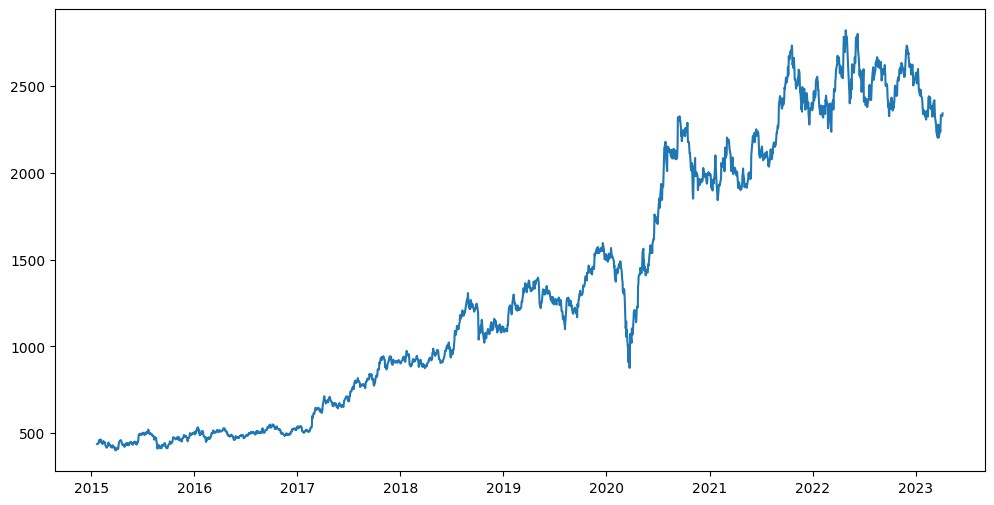

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data["Close"])

In [55]:
import numpy as np


In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
# print(df)
data = scaler.fit_transform(data)

print(data)

# print(scaler.inverse_transform(df))

[[0.01495163 0.477872  ]
 [0.01559681 0.49464029]
 [0.01603716 0.50649693]
 ...
 [0.79803834 0.55005742]
 [0.79572271 0.53825148]
 [0.80217351 0.56753005]]


In [83]:
data = np.array(data)
train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]
print(train_data,test_data)
train_Rdata,test_Rdata = data[:,1].reshape(-1,1),data[train_size:,1].reshape(-1,1)
train_Rdata

[[0.01495163 0.477872  ]
 [0.01559681 0.49464029]
 [0.01603716 0.50649693]
 ...
 [0.72120691 0.61114473]
 [0.73272339 0.66742366]
 [0.72889836 0.63848286]] [[0.73237186 0.65616329]
 [0.72228209 0.57857238]
 [0.72811272 0.6114867 ]
 [0.73694124 0.65857117]
 [0.74475677 0.69724016]
 [0.75627315 0.74890921]
 [0.7550119  0.73760044]
 [0.77273114 0.80955565]
 [0.76772754 0.76443179]
 [0.7714286  0.77969578]
 [0.78271753 0.82348165]
 [0.8216295  0.93133512]
 [0.83697101 0.96158743]
 [0.84329774 0.97314479]
 [0.83934873 0.93873944]
 [0.83697101 0.91744465]
 [0.81462041 0.73818772]
 [0.81333847 0.72890074]
 [0.81741165 0.74449782]
 [0.83804609 0.81498402]
 [0.82247723 0.70250025]
 [0.82404861 0.70848196]
 [0.82832845 0.7252703 ]
 [0.8389972  0.76542262]
 [0.86356006 0.84197676]
 [0.86058276 0.81896463]
 [0.87784708 0.8667439 ]
 [0.88760612 0.8907549 ]
 [0.8792531  0.82520816]
 [0.87569682 0.79760514]
 [0.87753695 0.80369913]
 [0.89095554 0.84618467]
 [0.91289263 0.90349161]
 [0.89248564 0.7533

array([[0.477872  ],
       [0.49464029],
       [0.50649693],
       ...,
       [0.55005742],
       [0.53825148],
       [0.56753005]])

In [84]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)
    
    

In [104]:
def CreateDatasetRSI(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)

In [108]:
time_steps = 50

train_x,train_y = CreateDataset(train_data,time_steps)
test_x,test_y = CreateDataset(test_data,time_steps)
train_Rx,train_Ry = CreateDatasetRSI(train_Rdata,time_steps)
test_Rx,test_Ry = CreateDatasetRSI(test_Rdata,time_steps)
train_Rx

array([[[0.477872  ],
        [0.49464029],
        [0.50649693],
        ...,
        [0.35300593],
        [0.40217695],
        [0.56422683]],

       [[0.49464029],
        [0.50649693],
        [0.59743954],
        ...,
        [0.40217695],
        [0.56422683],
        [0.66878157]],

       [[0.50649693],
        [0.59743954],
        [0.69005348],
        ...,
        [0.56422683],
        [0.66878157],
        [0.69732417]],

       ...,

       [[0.35469052],
        [0.3475012 ],
        [0.34259707],
        ...,
        [0.35393119],
        [0.37819358],
        [0.355163  ]],

       [[0.3475012 ],
        [0.34259707],
        [0.28965659],
        ...,
        [0.37819358],
        [0.355163  ],
        [0.5493826 ]],

       [[0.34259707],
        [0.28965659],
        [0.26868547],
        ...,
        [0.355163  ],
        [0.5493826 ],
        [0.55005742]]])

In [109]:
train_x.shape[2],train_y.shape,train_Rx.shape

(2, (1569,), (1975, 50, 1))

In [89]:
# train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
# test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM




In [111]:

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [117]:

RSI = Sequential()
RSI.add(LSTM(time_steps,activation='relu',return_sequences=True,input_shape=(train_Rx.shape[1],train_Rx.shape[2])))
RSI.add(LSTM(time_steps,return_sequences=True))
RSI.add(LSTM(time_steps,return_sequences=False))
RSI.add(Dropout(0.2))
RSI.add(Dense(1))
RSI.compile(optimizer='adam',loss="mse")

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10600     
                                                                 
 lstm_7 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
_________________________________________________________________


In [119]:
RSI.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [120]:
train_x.shape,train_y.shape

((1569, 50, 2), (1569,))

In [121]:
RSI.fit(train_Rx,train_Ry,validation_data=(train_Rx,train_Ry),epochs=100,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/100
124/124 [==============================] - 18s 92ms/step - loss: 0.0327 - val_loss: 0.0192
Epoch 2/100
124/124 [==============================] - 10s 79ms/step - loss: 0.0209 - val_loss: 0.0158
Epoch 3/100
124/124 [==============================] - 10s 81ms/step - loss: 0.0171 - val_loss: 0.0127
Epoch 4/100
124/124 [==============================] - 10s 79ms/step - loss: 0.0136 - val_loss: 0.0107
Epoch 5/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0118 - val_loss: 0.0082
Epoch 6/100
124/124 [==============================] - 11s 92ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 7/100
124/124 [==============================] - 10s 84ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 8/100
124/124 [==============================] - 11s 91ms/step - loss: 0.0073 - val_loss: 0.0050
Epoch 9/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0066 - val_loss: 0.0048
Epoch 10/100
124/124 [==============================] - 9s 77ms/step - lo

Epoch 80/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 81/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 82/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 83/100
124/124 [==============================] - 10s 79ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 84/100
124/124 [==============================] - 10s 79ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 85/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 86/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 87/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 88/100
124/124 [==============================] - 10s 80ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 89/100
124/124 [==============================] - 10s 82ms

In [122]:
model.fit(train_x,train_y,validation_data=(train_x,train_y),epochs=50,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/50
99/99 [==============================] - 15s 90ms/step - loss: 0.0130 - val_loss: 9.0605e-04
Epoch 2/50
99/99 [==============================] - 8s 80ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/50
99/99 [==============================] - 8s 81ms/step - loss: 0.0018 - val_loss: 8.5991e-04
Epoch 4/50
99/99 [==============================] - 8s 80ms/step - loss: 0.0018 - val_loss: 6.0724e-04
Epoch 5/50
99/99 [==============================] - 8s 80ms/step - loss: 0.0015 - val_loss: 4.7884e-04
Epoch 6/50
99/99 [==============================] - 8s 79ms/step - loss: 0.0015 - val_loss: 7.4570e-04
Epoch 7/50
99/99 [==============================] - 8s 81ms/step - loss: 0.0014 - val_loss: 6.9523e-04
Epoch 8/50
99/99 [==============================] - 8s 81ms/step - loss: 0.0014 - val_loss: 3.7762e-04
Epoch 9/50
99/99 [==============================] - 8s 81ms/step - loss: 0.0011 - val_loss: 4.2761e-04
Epoch 10/50
99/99 [==============================] - 8s 80ms/step - loss: 0.

In [123]:
predict = model.predict(test_x)
predictR = RSI.predict(test_Rx)
print(1-np.square(predict-test_y).mean())
print(1-np.square(predictR-test_Ry).mean())

12/12 [==============================] - 1s 26ms/step
0.9941678714704063
0.9569155358911489


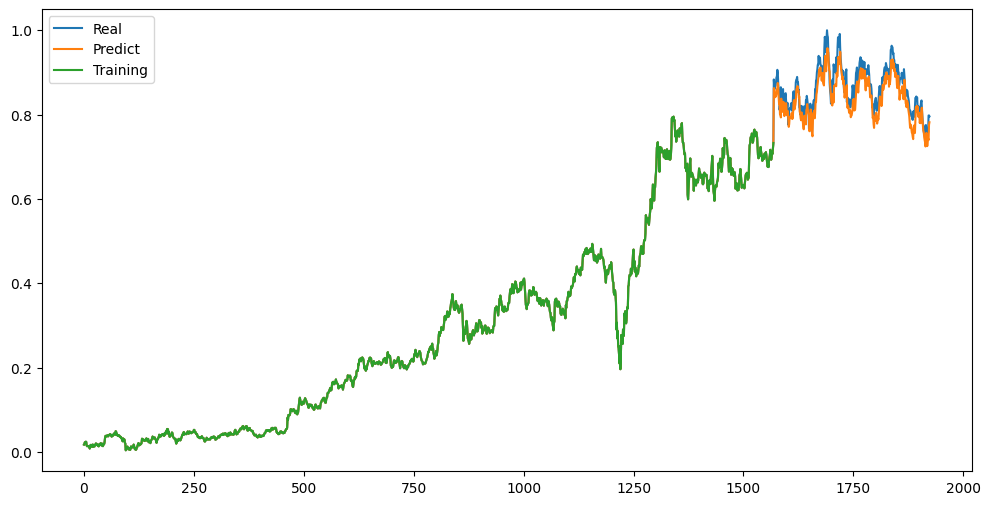

In [124]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])


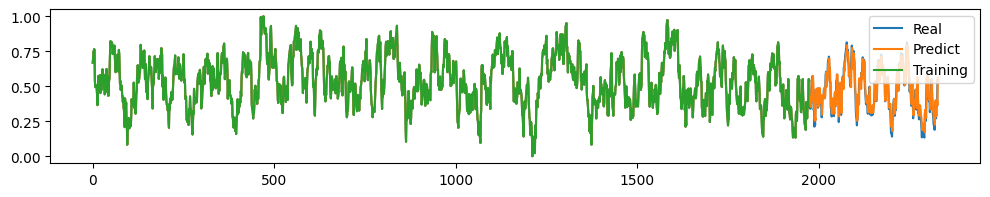

In [126]:
plt.figure(figsize=(12,2))
# plt.plot(data)
plt.plot(np.append(train_Ry,test_Ry))
plt.plot(np.append(train_Ry,predictR))
plt.plot(train_Ry)
plt.legend(["Real",'Predict','Training'])

In [179]:
future = 100
lists = np.array(test_x[0]).reshape(1,test_x.shape[1],test_x.shape[2])
listsR= np.array(test_Rx[0].reshape(1,time_steps,1))
# print(listsR)
l=[]
lR = []
predsR =[]
for i in range(len(test_x)-1):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,2))
    predR = RSI.predict(listsR[i].reshape(1,time_steps,1))
#     [[1,2,3],[2,3,4],[5,6,7]]
    
   
    lR = np.append(listsR[i],predR)
    predsR.append(predR[0][0])
    lR = np.delete(lR,0)
#     print(listsR)
    
    listsR = np.vstack([listsR,lR.reshape(1,time_steps,1)])
#     print(pred.reshape(1,2))

    pred = np.append(pred,predR)
    l = np.vstack([lists[i],pred])
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,2)])
#     print(listsR)
#     print(lists)
print(preds)
print(lists)

0
1/1 [==============================] - 0s 34ms/step
1
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 35ms/step
3
1/1 [==============================] - 0s 32ms/step
4
1/1 [==============================] - 0s 36ms/step
5
1/1 [==============================] - 0s 47ms/step
6
1/1 [==============================] - 0s 36ms/step
7
1/1 [==============================] - 0s 42ms/step
8
1/1 [==============================] - 0s 34ms/step
9
1/1 [==============================] - 0s 36ms/step
10
1/1 [==============================] - 0s 35ms/step
11
1/1 [==============================] - 0s 36ms/step
12
1/1 [==============================] - 0s 35ms/step
13
1/1 [==============================] - 0s 44ms/step
14
1/1 [==============================] - 0s 33ms/step
15
1/1 [==============================] - 0s 36ms/step
16
1/1 [==============================] - 0s 35ms/step
17
1/1 [==============================] - 0s 38ms/step
18
1/1 [============

1/1 [==============================] - 0s 34ms/step
77
1/1 [==============================] - 0s 33ms/step
78
1/1 [==============================] - 0s 43ms/step
79
1/1 [==============================] - 0s 35ms/step
80
1/1 [==============================] - 0s 35ms/step
81
1/1 [==============================] - 0s 33ms/step
82
1/1 [==============================] - 0s 45ms/step
83
1/1 [==============================] - 0s 33ms/step
84
1/1 [==============================] - 0s 35ms/step
85
1/1 [==============================] - 0s 45ms/step
86
1/1 [==============================] - 0s 33ms/step
87
1/1 [==============================] - 0s 34ms/step
88
1/1 [==============================] - 0s 35ms/step
89
1/1 [==============================] - 0s 34ms/step
90
1/1 [==============================] - 0s 33ms/step
91
1/1 [==============================] - 0s 36ms/step
92
1/1 [==============================] - 0s 36ms/step
93
1/1 [==============================] - 0s 36ms/step
94
1/1 [=====

1/1 [==============================] - 0s 36ms/step
153
1/1 [==============================] - 0s 34ms/step
154
1/1 [==============================] - 0s 35ms/step
155
1/1 [==============================] - 0s 35ms/step
156
1/1 [==============================] - 0s 36ms/step
157
1/1 [==============================] - 0s 34ms/step
158
1/1 [==============================] - 0s 35ms/step
159
1/1 [==============================] - 0s 33ms/step
160
1/1 [==============================] - 0s 35ms/step
161
1/1 [==============================] - 0s 34ms/step
162
1/1 [==============================] - 0s 37ms/step
163
1/1 [==============================] - 0s 36ms/step
164
1/1 [==============================] - 0s 35ms/step
165
1/1 [==============================] - 0s 34ms/step
166
1/1 [==============================] - 0s 34ms/step
167
1/1 [==============================] - 0s 34ms/step
168
1/1 [==============================] - 0s 35ms/step
169
1/1 [==============================] - 0s 35ms/s

1/1 [==============================] - 0s 39ms/step
229
1/1 [==============================] - 0s 37ms/step
230
1/1 [==============================] - 0s 37ms/step
231
1/1 [==============================] - 0s 36ms/step
232
1/1 [==============================] - 0s 35ms/step
233
1/1 [==============================] - 0s 36ms/step
234
1/1 [==============================] - 0s 44ms/step
235
1/1 [==============================] - 0s 42ms/step
236
1/1 [==============================] - 0s 37ms/step
237
1/1 [==============================] - 0s 35ms/step
238
1/1 [==============================] - 0s 36ms/step
239
1/1 [==============================] - 0s 36ms/step
240
1/1 [==============================] - 0s 43ms/step
241
1/1 [==============================] - 0s 38ms/step
242
1/1 [==============================] - 0s 41ms/step
243
1/1 [==============================] - 0s 34ms/step
244
1/1 [==============================] - 0s 39ms/step
245
1/1 [==============================] - 0s 38ms/s

1/1 [==============================] - 0s 33ms/step
304
1/1 [==============================] - 0s 34ms/step
305
1/1 [==============================] - 0s 35ms/step
306
1/1 [==============================] - 0s 35ms/step
307
1/1 [==============================] - 0s 41ms/step
308
1/1 [==============================] - 0s 41ms/step
309
1/1 [==============================] - 0s 35ms/step
310
1/1 [==============================] - 0s 34ms/step
311
1/1 [==============================] - 0s 39ms/step
312
1/1 [==============================] - 0s 40ms/step
313
1/1 [==============================] - 0s 35ms/step
314
1/1 [==============================] - 0s 44ms/step
315
1/1 [==============================] - 0s 35ms/step
316
1/1 [==============================] - 0s 35ms/step
317
1/1 [==============================] - 0s 35ms/step
318
1/1 [==============================] - 0s 36ms/step
319
1/1 [==============================] - 0s 34ms/step
320
1/1 [==============================] - 0s 36ms/s

In [180]:
preds = np.array(preds)
predsR = np.array(predsR)


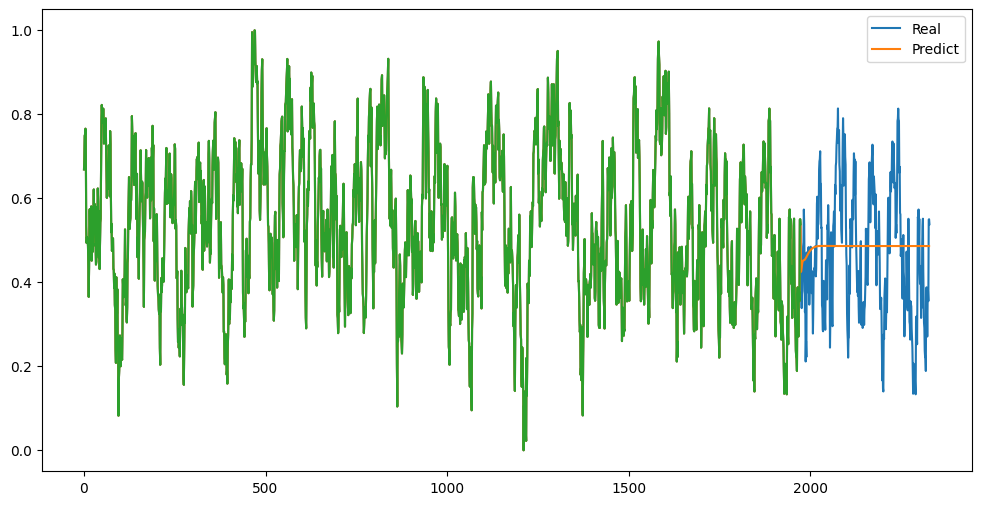

In [183]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_Ry,test_Ry))
plt.plot(np.append(train_Ry,predsR))
plt.plot(train_Ry)
plt.legend(["Real",'Predict'])